<h1 align="center">ЧАСТЬ 2</h1>
<h1 align="center">Классификации анализа настроений - Обзор и сравнение</h1>

First, we needed to create vector words. For simplicity, we used a pre-trained model.

Google смогла обучить модели Word2Vec на огромном наборе данных Google News, который содержал более 100 миллиардов различных слов! Google создал [вектор из 3 миллионов слов](https://code.google.com/archive/p/word2vec/#Pre-trained_word_and_phrase_vectors) из этой модели каждый имеет размер 300. Мы будем использовать эти векторы.

#### Как работает word2vec:

Идея word2vec заключается в том, что:

    Возьмем 3-слойную нейронную сеть. (1 входной слой + 1 скрытый слой + 1 выходной слой)
    Скормим ему слово и обучим его предсказывать соседнее слово.
    Удалим последний (выходной слой) и сохраним входной и скрытый слои.
    Теперь введем слово из словаря. Выходные данные, выдаваемые на скрытом слое, - это "встраивание слова" во входное слово.
    
Два популярных примера методов изучения встраивания слов из текста включают в себя:

- `Word2Vec`
- `GloVe` (Global Vectors for Word Representation)

Для начала давайте загрузим необходимые библиотеки:
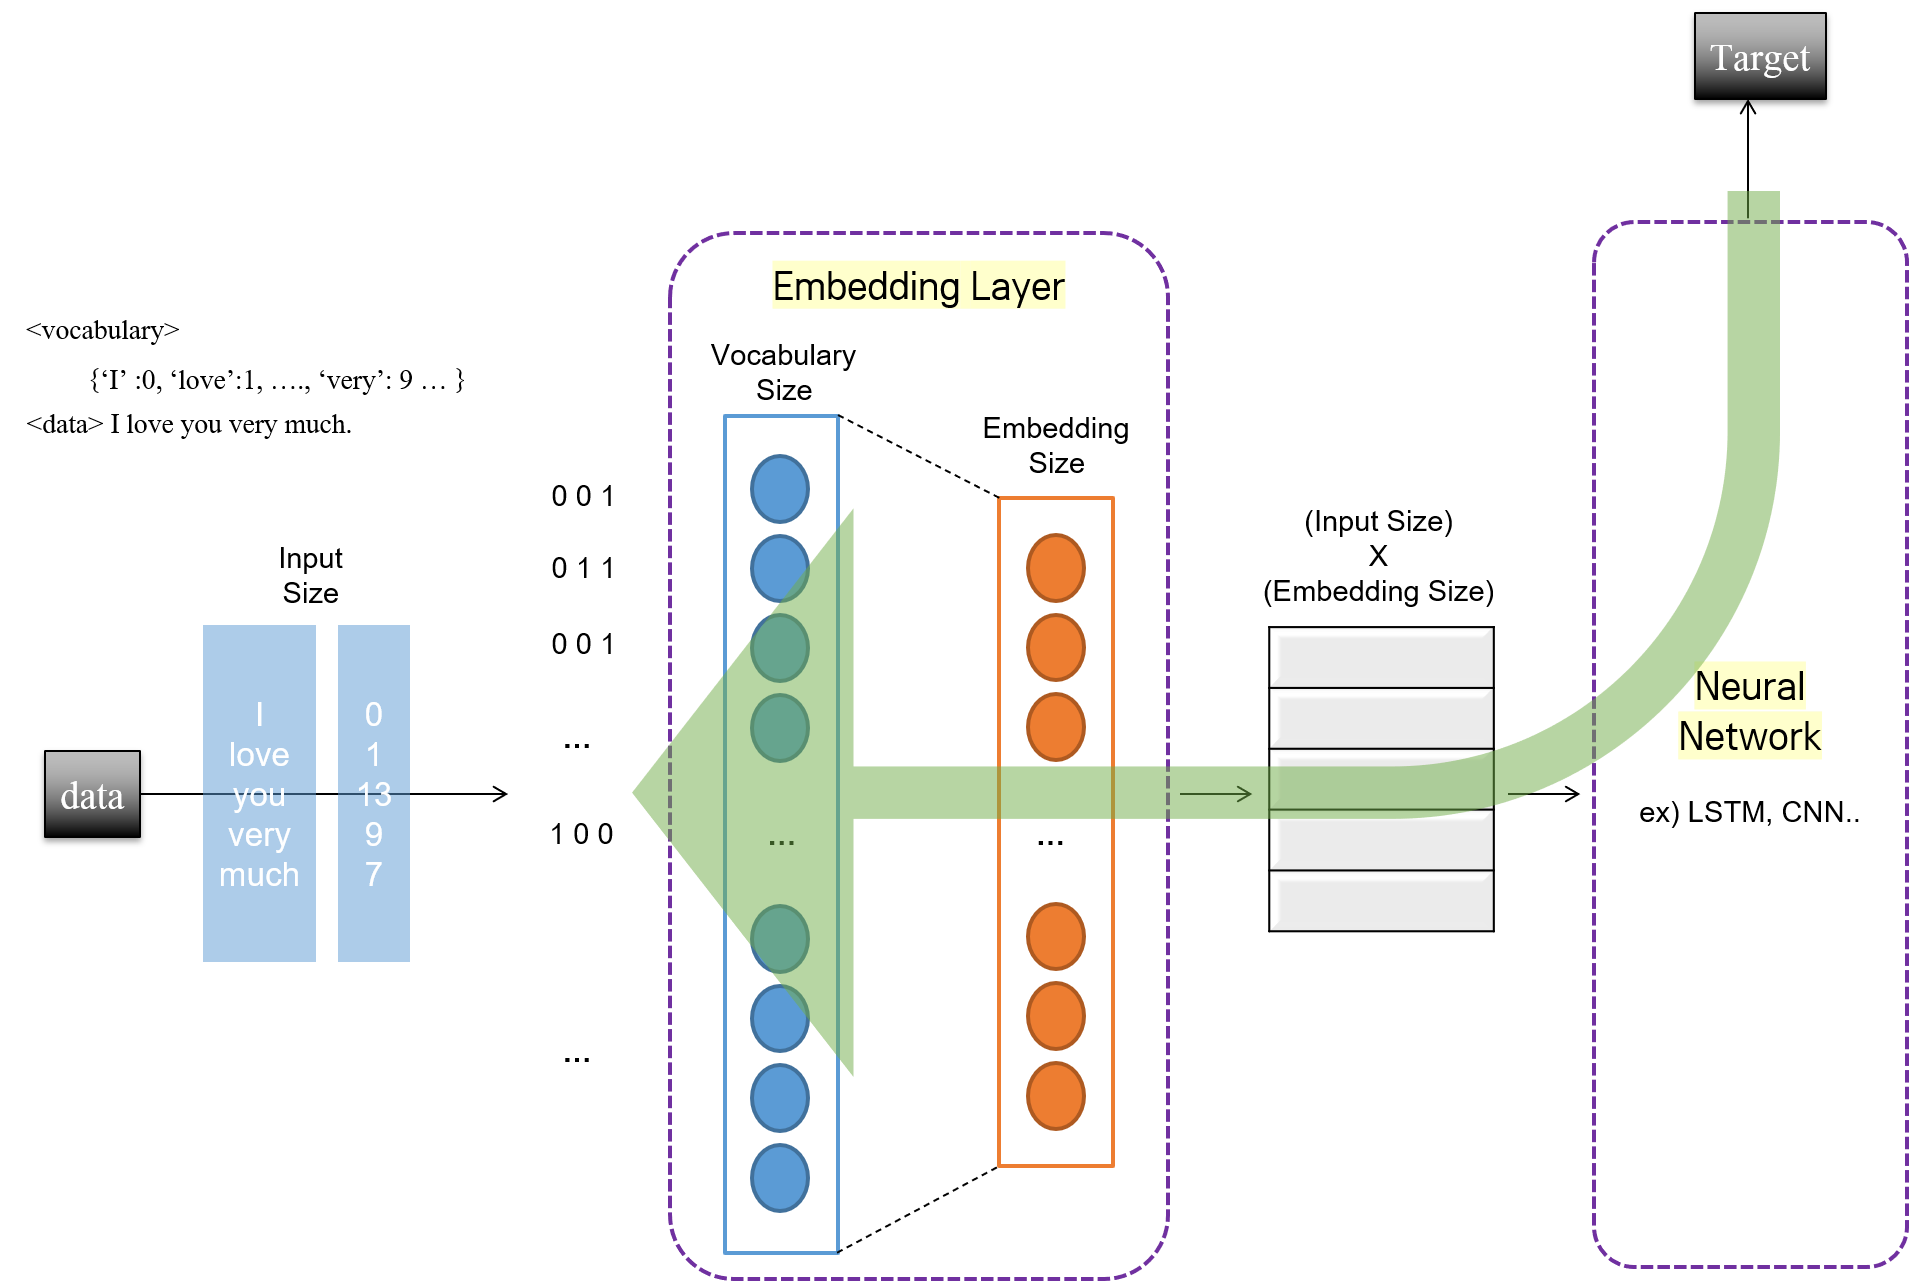

In [1]:
import numpy as np
import pandas as pd
import pickle
import gensim, logging
import gensim.models.keyedvectors as word2vec
import matplotlib.pyplot as plt

%matplotlib inline

Также давайте напишем стиль для выравнивания по середине всех графиков, изображений и т.д.:

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Далее мы загрузим образцы данных, которые мы обработали в предыдущей части:

In [3]:
with open('documents.pql', 'rb') as f:
     docs = pickle.load(f)

In [4]:
print("Number of documents:", len(docs))

Number of documents: 38544


Следующая операция может занять некоторое время, так как модель содержит 3 000 000 слов, поэтому мы получим матрицу встраивания размером 3 000 000 x 300, которая содержит все значения векторов слов.

In [5]:
model = word2vec.KeyedVectors.load_word2vec_format('model/GoogleNews-vectors-negative300.bin', binary=True)

Теперь давайте составим список всех слов из нашего словаря:

In [7]:
words = list(model.index_to_key)

Просто чтобы убедиться, что все загружено правильно, мы можем посмотреть на размеры списка словарей и матрицы встраивания:

In [9]:
print(words[:50], "\n\nTotal words:", len(words), "\n\nWord-Vectors shape:", model.vectors.shape)

['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said', 'was', 'the', 'at', 'not', 'as', 'it', 'be', 'from', 'by', 'are', 'I', 'have', 'he', 'will', 'has', '####', 'his', 'an', 'this', 'or', 'their', 'who', 'they', 'but', '$', 'had', 'year', 'were', 'we', 'more', '###', 'up', 'been', 'you', 'its', 'one', 'about', 'would', 'which', 'out'] 

Total words: 3000000 

Word-Vectors shape: (3000000, 300)


Мы также можем найти такое слово, как "футбол" ("football"), в нашем списке слов, а затем получить доступ к соответствующему вектору через матрицу встраивания:

In [10]:
print(model['football'])

[-9.76562500e-02  3.19824219e-02  2.57812500e-01 -4.15039062e-02
  1.01562500e-01 -1.00585938e-01  1.46484375e-01 -1.99218750e-01
  1.53320312e-01  6.34765625e-02  8.39843750e-02 -3.00781250e-01
  6.34765625e-02  2.08984375e-01 -2.11914062e-01  1.88476562e-01
 -8.34960938e-02  3.28125000e-01  2.79296875e-01 -1.40625000e-01
 -1.68945312e-01  2.04101562e-01  4.90722656e-02 -6.98852539e-03
  9.42382812e-02  9.84191895e-04  3.12500000e-02  2.48046875e-01
  3.35937500e-01  2.63671875e-01  5.68847656e-02  3.04687500e-01
  1.21582031e-01 -1.97265625e-01  1.72119141e-02  9.96093750e-02
  2.27539062e-01 -1.20605469e-01  1.23535156e-01  3.78906250e-01
  2.36816406e-02 -1.86523438e-01  6.29882812e-02  1.52343750e-01
  3.73535156e-02 -1.69921875e-01  1.06445312e-01 -4.98046875e-02
 -6.20117188e-02  1.68945312e-01  4.41894531e-02  2.78320312e-02
 -1.10839844e-01  4.49218750e-02  2.78320312e-02 -4.45312500e-01
  3.49121094e-02 -6.22558594e-02 -3.93066406e-02 -2.01171875e-01
 -3.04687500e-01 -1.00585

<h2 align="center">Модель встраивания среднего значения слова</h2>

Что ж, давайте начнем анализировать наши векторы. Нашим первым подходом будет модель встраивания **усредненного значения слов**. 

Суть этого наивного подхода заключается в том, чтобы взять среднее значение всех векторов слов из предложения, чтобы получить один 300-мерный вектор, представляющий тон всего предложения, который мы вводим в модель и пытаемся получить какой-то быстрый результат.

Нам не нужно было вводить try/except, но, несмотря на то, что я очистил наш образец, после обработки осталась пара слов, которые нужно было найти и удалить.

In [11]:
def sent_embed(words, docs):
    x_sent_embed, y_sent_embed = [], []
    count_words, count_non_words = 0, 0  
    
    # восстановите вложение каждого предложения по среднему значению вектора, из которого оно состоит
    # sent - предложение, state - состояние предложения (pos/neg)
    for sent, state in docs:
        # среднее вложение всех слов в предложение
        sent_embed = []
        for word in sent:
            try:
                # если слово присутствует в словаре - и его векторное представление
                count_words += 1
                sent_embed.append(model[word])
            except KeyError:
                # если слова нет в словаре - добавьте нулевой вектор
                count_non_words += 1
                sent_embed.append([0] * 300)
        
        # добавьте вектор предложения в список
        x_sent_embed.append(np.mean(sent_embed, axis=0).tolist())
        
        # добавьте метку к y_sent_embed
        if state == 'pos': y_sent_embed.append(1)
        elif state == 'neg': y_sent_embed.append(0)
            
    print(count_non_words, "out of", count_words, "words were not found in the vocabulary.")
    
    return x_sent_embed, y_sent_embed

In [12]:
x, y = sent_embed(words, docs)

48251 out of 1802696 words were not found in the vocabulary.


<h2 align="center">Косинусная мера сходства</h2>

Чтобы измерить сходство двух слов, нам нужен способ измерить степень сходства между двумя векторами встраивания для этих двух слов. Пусть у нас есть 2 вектора $u$ и $v$, тогда косинусное сходство между ними определяется следующим образом:

$$\text{cosine\_similarity(u, v)} = \frac {u \cdot v} {||u||_2 ||v||_2} = \cos(\theta)$$

где:

* $u.v$ - скалярное произведение двух векторов;

* $||u||_2$ - норма (длина) вектора $u$;
    
    * **Примечание**: норма $u$ определяется как $ ||u||_2 = \sqrt{\sum_{i=1}^{n} u_i^2}$)

* $\theta$ есть угол между $u$ и $v$. 

Это сходство зависит от угла между $u$ и $v$. Если $u$ и $v$ очень похожи, их косинусное сходство будет близко к 1; если они непохожи, косинусное сходство примет меньшее значение. 

**`cosine_similarity()`** - метод, который используется для оценки сходства между векторами слов.

In [13]:
def cosine_similarity(u, v):
    """
    Косинусное сходство отражает степень сходства между u и v
        
    Аргументы:
        u -- вектор слов размерностью (n,)          
        v -- вектор слов размерностью (n,)

    Выход функции:
        cosine_similarity -- косинусное сходство между u и v определяется приведенной выше формулой.
    """
    
    distance = 0.0
    
    # расчет скалярного произведения u * v
    dot = np.dot(u,v)
    
    # расчет нормы L2 для вектора u
    norm_u = np.sqrt(sum(u**2))
    
    # расчет нормы L2 для вектора v
    norm_v = np.sqrt(sum(v**2))
    
    # Расчет косинусной меры сходства, определенной по приведенной выше формуле
    cosine_similarity = dot/(norm_u*norm_v)
    
    return cosine_similarity

<h2 align="center">Разделение корпуса текстов</h2>

Теперь, для дальнейшей работы, мы разделим наш корпус на наборы для обучения, тестирования и разработки:

In [21]:
from sklearn.model_selection import train_test_split

# Обучающая выборка
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Валидационная выборка
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [22]:
print('Length of x_train:', len(x_train), '| Length of y_train:', len(y_train))
print('Length of x_test:  ', len(x_test), '| Length of y_test: ', len(y_test))
print('Length of x_val:   ', len(x_val), '| Length of y_val:  ', len(y_val))

Length of x_train: 24668 | Length of y_train: 24668
Length of x_test:   7709 | Length of y_test:  7709
Length of x_val:    6167 | Length of y_val:   6167


In [23]:
print("Shape of x_train set:", np.array(x_train).shape)

Shape of x_train set: (24668, 300)


<h2 align="center">Визуализация отчета о классификации</h2>

Эти методы понадобятся нам, когда мы начнем визуализировать наши данные, поэтому подготовим их.

Следующая функция принимает вывод функции `classification_report` в качестве аргумента и выводит результаты (функция основана на [этом](https://stackoverflow.com/a/31689645/14467732 ) решении).

In [24]:
def plot_classification_report(classification_report, title='Classification Report', cmap='RdBu'):
    
    lines = classification_report.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    
    for line in lines[2 : (len(lines) - 5)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    xlabel = 'Metrics'
    ylabel = 'Classes'
    
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

Эта функция предназначена для создания тепловой карты с текстом в каждой ячейке с использованием библиотеки matplotlib (код основан на идее, взятой [здесь](https://stackoverflow.com/a/16124677/14467732 )):

In [25]:
def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    fig, ax = plt.subplots()
    c = ax.pcolor(AUC, edgecolors='k', linestyle='dashed', linewidths=0.2, cmap=cmap)

    # поставьте крупные галочки в середине каждой ячейки
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # определим подписи меток
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # Заголовок и метки осей x/y
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Удаляем последний (пустой) столбец
    plt.xlim( (0, AUC.shape[1]) )

    # выключаем все галочки
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # добавляем лекгенду цветов
    plt.colorbar(c)

    # добавляем текст в каждую ячейку
    show_val(c)

    # правильное направление осей координат (начало координат вверху слева, а не внизу слева)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # подбор размера
    fig = plt.gcf()
    fig.set_size_inches(cm_to_inch(figure_width, figure_height))

Эта функция просто вставляет текст в ячейки тепловой карты (идея взята [здесь](https://stackoverflow.com/a/25074150/14467732 )):

In [26]:
def show_val(pc, fmt="%.2f", **kw):
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

Последняя вспомогательная функция предназначена для указания размера фигуры в сантиметрах в matplotlib, поскольку по умолчанию существует только метод `set_size_inches`, следовательно, мы будем преобразовывать дюймы в сантиметры и использовать этот метод:

In [27]:
def cm_to_inch(*dim):
    inch = 2.54
    return tuple(i/inch for i in dim[0]) if type(dim[0]) == tuple else tuple(i/inch for i in dim)

**Примечание:** Чтобы лучше понять следующие классификаторы, я советую вам прочитать [эту статью](https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222 ) или другие подобные, которые вы найдете в Интернете.

<h2 align="center">Модель К ближайших соседей</h2>

Алгоритм K-ближайших соседей (KNN) - это тип контролируемых алгоритмов машинного обучения. KNN чрезвычайно прост в реализации в своей самой базовой форме и, тем не менее, выполняет довольно сложные задачи классификации.  Это алгоритм ленивого обучения, поскольку в нем нет специализированной фазы обучения. Скорее, он использует все данные для обучения при классификации новой точки данных или экземпляра.  KNN также является непараметрическим алгоритмом обучения, что означает, что он ничего не предполагает о базовых данных.


Алгоритм KNN просто вычисляет расстояние от новой точки данных до всех других точек обучающих данных. Расстояние может быть любого типа, например, евклидово, Манхэттенское и т.д. Затем он выбирает K-ближайшие точки данных, где K может быть любым целым числом. Наконец, он присваивает точку данных классу, к которому принадлежит большинство из K точек данных.

Теперь давайте построим модель классификатора KNN.

Сначала мы импортируем модуль `KNeighborsClassifier` и создаем объект классификатора KNN, передавая аргумент number of neighbors в функцию `KNeighborsClassifier()`. Затем подгоняем нашу модель к набору поездов с помощью `fit()` и выполняем прогнозирование на тестовом наборе с помощью `predict()`.

Одним из способов помочь найти наилучшее значение соседей является построение графика значения соседей и соответствующей частоты ошибок для набора данных. Мы построим график средней ошибки для прогнозируемых значений тестового набора для всех соседних значений в диапазоне от 1 до 25.
Для этого давайте сначала вычислим среднее значение ошибки для всех прогнозируемых значений, где соседние значения варьируются от 1 до 25:

In [28]:
from sklearn.neighbors import KNeighborsClassifier

error = []

# ошибка вычисления для соседних значений между 1 и 25
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Следующим шагом является сопоставление значений ошибок с соседними значениями:

Text(0, 0.5, 'Mean Error')

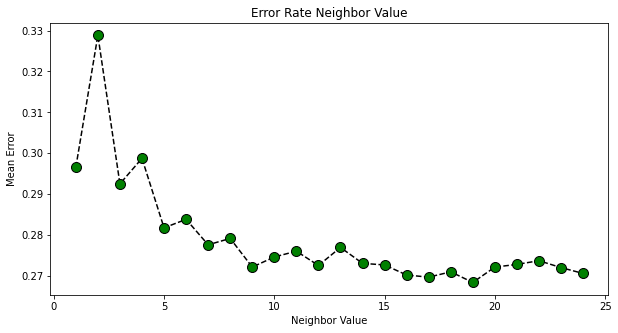

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 25), error, color='black', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate Neighbor Value')
plt.xlabel('Neighbor Value')
plt.ylabel('Mean Error')

Как мы видим, лучше всего взять k=19, но все равно средняя погрешность немного выше нормы.

In [30]:
# создадим классификатор KNN
knn = KNeighborsClassifier(n_neighbors=19, weights='distance')

# обучим классификатор, используя обучающие выборки
knn.fit(x_train, y_train)

# предскажем ответ для тестовых выборок
y_pred = knn.predict(x_test)

print("Nearest Neighbors Result (k=19):\n" + '-' * 35)
print("Accuracy Score (k=19):", str(round(knn.score(x_test, y_test) * 100, 2)) + '%')
print("Accuracy (x_train, y_train):", str(round(knn.score(x_train, y_train), 4) * 100) + '%')

Nearest Neighbors Result (k=19):
-----------------------------------
Accuracy Score (k=19): 75.41%
Accuracy (x_train, y_train): 100.0%


Точность модели хорошая, мы можем с ней работать.

Теперь давайте изучим результаты нашей классификации KNN с помощью функции `classification_report` из sklearn.metrics:

In [31]:
from sklearn.metrics import classification_report
print('\nClassification KNN:\n', classification_report(y_test, knn.predict(x_test)))


Classification KNN:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69      3331
           1       0.75      0.84      0.80      4378

    accuracy                           0.75      7709
   macro avg       0.75      0.74      0.74      7709
weighted avg       0.75      0.75      0.75      7709



Теперь, наконец, давайте визуализируем наш отчет о классификации:

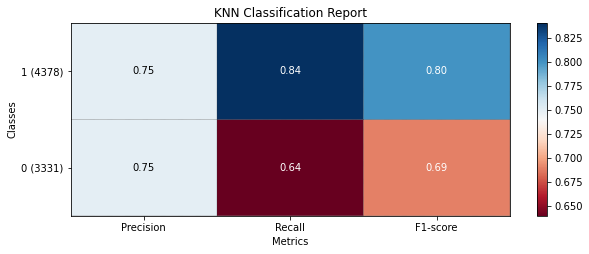

In [32]:
plot_classification_report(classification_report(y_test, knn.predict(x_test)), title='KNN Classification Report')

<h2 align="center">Логистическая регрессия</h2>

Логистическая регрессия - это классификацирующий алгоритм машинного обучения, который используется для прогнозирования вероятности категориальной зависимой переменной. В логистической регрессии зависимая переменная - это двоичная переменная, которая содержит данные, закодированные как 1 (да, успех и т.д.) или 0 (нет, неудача и т.д.). Другими словами, модель логистической регрессии предсказывает P(Y=1) как функцию от X.

In [33]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(solver='liblinear', multi_class='ovr', n_jobs=1)
logit.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [34]:
print("Accuracy Score:", str(round(logit.score(x_test, y_test) * 100, 2)) + '%')

Accuracy Score: 80.58%


In [35]:
print('\nClassification Logistic Regression:\n', classification_report(y_test, logit.predict(x_test)))


Classification Logistic Regression:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      3331
           1       0.82      0.84      0.83      4378

    accuracy                           0.81      7709
   macro avg       0.80      0.80      0.80      7709
weighted avg       0.81      0.81      0.81      7709



И визуализируем метрики качества классификации:

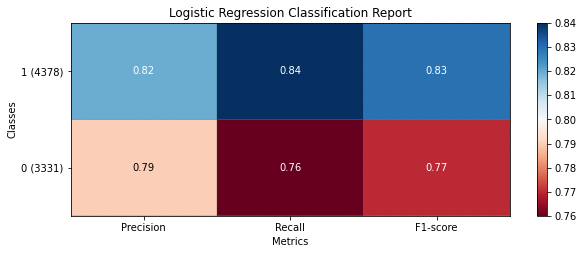

In [36]:
plot_classification_report(classification_report(y_test, logit.predict(x_test)), title='Logistic Regression Classification Report')

<h2 align="center">Классификатор "Случайный лес"</h2>

Случайный лес или лес случайных решений - это алгоритм машинного обучения с учителем, используемый для классификации, регрессии и других задач с использованием деревьев решений.

Классификатор случайных лесов создает набор деревьев решений из случайно выбранного подмножества обучающего набора. По сути, это набор деревьев решений (DT) из случайно выбранного подмножества обучающего набора, а затем он собирает голоса из разных деревьев решений для определения окончательного прогноза.

In [37]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

print("Accuracy Score:", str(round(clf.score(x_test, y_test), 4) * 100) + '%')

Accuracy Score: 79.54%


In [38]:
print('\nClassification Random Forest:\n', classification_report(y_test, clf.predict(x_test)))


Classification Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.69      0.74      3331
           1       0.79      0.88      0.83      4378

    accuracy                           0.80      7709
   macro avg       0.80      0.78      0.79      7709
weighted avg       0.80      0.80      0.79      7709



Now let's visualize our classification report:

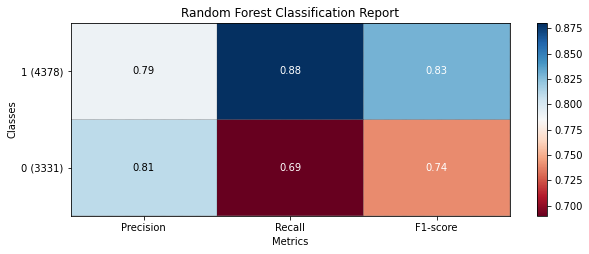

In [39]:
plot_classification_report(classification_report(y_test, clf.predict(x_test)), title='Random Forest Classification Report')

<h2 align="center">Модель опорных векторов</h2>

Машины опорных векторов (SVM) - это набор методов машинного обучения с учителем, используемых для классификации, регрессии и обнаружения выбросов.

Преимущества машин опорных векторов заключаются в следующем:

    + Эффективны в пространствах большой размерности.

    + По-прежнему эффективны в тех случаях, когда количество переменных превышает размер выборок.

    + Использует подмножество обучающих точек в функции принятия решения (называемых опорными векторами), так что это также экономит память.

    + Универсальность: для функции принятия решения могут быть заданы различные функции ядра. Предоставляются общие ядра, но также возможно указать пользовательские ядра.

К недостаткам машин опорных векторов относятся:

    - Если количество функций намного превышает количество выборок, избегайте чрезмерного обучения при выборе функций ядра, и решающее значение имеет условия регуляризации .

    - SVM напрямую не предоставляют оценки вероятности, они рассчитываются с использованием дорогостоящей пятикратной перекрестной проверки (см. Оценки и вероятности ниже).
    
Вы можете прочитать больше об этом [здесь](https://en.wikipedia.org/wiki/Support-vector_machine ).

In [41]:
from sklearn import svm

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', probability=True)
SVM.fit(x_train[int(len(x_train)*0.75):], y_train[int(len(y_train)*0.75):])

print("Accuracy Score:", str(round(SVM.score(x_test[int(len(x_test)*0.75):], y_test[int(len(y_test)*0.75):]), 4) * 100) + '%')

Accuracy Score: 79.36%


In [42]:
print('\nClassification SVM:\n', classification_report(y_test, SVM.predict(x_test)))


Classification SVM:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      3331
           1       0.82      0.84      0.83      4378

    accuracy                           0.80      7709
   macro avg       0.80      0.80      0.80      7709
weighted avg       0.80      0.80      0.80      7709



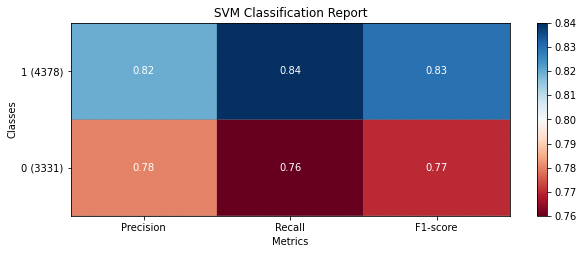

In [43]:
plot_classification_report(classification_report(y_test, SVM.predict(x_test)), title='SVM Classification Report')

<h2 align="center">Сравнение моделей</h2> 

Полезным инструментом при прогнозировании вероятности бинарного результата является кривая рабочих характеристик приемника, или ROC-кривая.

Это график частоты ложных срабатываний (ось x) в сравнении с частотой истинных срабатываний (ось y) для ряда различных возможных пороговых значений в диапазоне от 0,0 до 1,0. Другими словами, он отображает частоту ложных срабатываний в зависимости от частоты попаданий.

Показатель истинно положительных результатов рассчитывается как количество истинно положительных результатов, деленное на сумму количества истинно положительных результатов и количества ложноотрицательных результатов. Он описывает, насколько хороша модель в прогнозировании положительного класса, когда фактический результат положительный.

Частота ложных срабатываний рассчитывается как количество ложноположительных срабатываний, деленное на сумму количества ложноположительных срабатываний и количества истинно отрицательных срабатываний.

Его также называют частотой ложных тревог, поскольку он суммирует, как часто прогнозируется положительный класс, когда фактический результат отрицательный.

Для большей ясности:
* Меньшие значения по оси графика x указывают на меньшее количество ложноположительных срабатываний и большее количество истинно отрицательных.
* Большие значения по оси графика y указывают на более высокие истинные срабатывания и меньшие ложноотрицательные результаты.

In [44]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

fprKNN, tprKNN, thresholdsKNN = metrics.roc_curve(y_test, knn.predict_proba(x_test)[:, 1])
fprLR, tprLR, thresholdsLR = metrics.roc_curve(y_test, logit.predict_proba(x_test)[:, 1])
fprCLF, tprCLF, thresholdCLF = metrics.roc_curve(y_test, clf.predict_proba(x_test)[:, 1])
fprSVM, trpSVM, thresholdSVM = metrics.roc_curve(y_test, SVM.predict_proba(x_test)[:, 1])

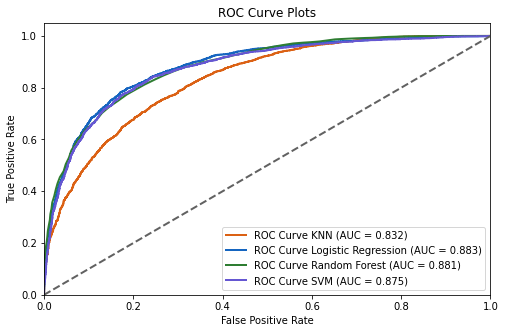

In [45]:
linewidth = 2
plt.figure(figsize=(8, 5))

plt.plot(fprKNN, tprKNN, color='#db6114', lw=linewidth, label='ROC Curve KNN (AUC = %0.3f)' % auc(fprKNN, tprKNN))
plt.plot(fprLR, tprLR, color='#1565c0', lw=linewidth, label='ROC Curve Logistic Regression (AUC = %0.3f)' % auc(fprLR, tprLR))
plt.plot(fprCLF, tprCLF, color='#2e7d32',lw=linewidth, label='ROC Curve Random Forest (AUC = %0.3f)' % auc(fprCLF, tprCLF))
plt.plot(fprSVM, trpSVM, color='#6557d2',lw=linewidth, label='ROC Curve SVM (AUC = %0.3f)' % auc(fprSVM, trpSVM))
plt.plot([0, 1], [0, 1], color='#616161', lw=linewidth, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Plots')
plt.legend(loc="lower right")

plt.show()

Основываясь на этих данных, мы можем сделать вывод, что лучшей моделью на данный момент является **Модель логистической регрессии** с "AUC = 88,3%" и "Показателем точности = 80,58%".

Давайте сохраним эту модель:

In [46]:
with open('LRModel.pickle', 'wb') as m:
    pickle.dump(logit, m)

Давайте проверим, все ли загружено правильно:

In [47]:
with open('LRModel.pickle', 'rb') as m:
     rf = pickle.load(m)

print("Logistic Regression Accuracy Score:", str(round(clf.score(x_test, y_test), 4) * 100) + '%')

Logistic Regression Accuracy Score: 79.54%


В следующей части мы, наконец, опробуем нейронную сеть **LSTM**, которая берет последовательность слов и запоминает порядок слов в предложении, этот подход должен дать нам наилучшие результаты.